# PREDICTING BRENT CRUDE OIL PRICES USING FACEBOOK PROPHET 





# STEP #0: PROBLEM STATEMENT

- Data represents daily 2016 - 2021 for brent crude oil price. 
- Predicting the price of brent crude oil in 1 month time.

Columns in the dataset:

- Date - The date of the observation
- BrentCrudePrice - The price of brent crude oil




# STEP #1: IMPORTING DATA

- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet

- Prophet is open source software released by Facebook’s Core Data Science team.

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 

- For more information, please check this out: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet


In [2]:
# dataframes creation for both training and testing datasets 
brentcrudeoil_df = pd.read_csv('BrentCrudePrice.csv')


# STEP #2: EXPLORING THE DATASET  

In [3]:
# Let's view the head of the training dataset
brentcrudeoil_df.head()

,DATE,BrentCrudePrice
0,2/22/2016,33.59
1,2/23/2016,31.90
2,2/24/2016,31.50
3,2/25/2016,32.83
4,2/26/2016,35.76


In [4]:
# Let's view the last elements in the training dataset
brentcrudeoil_df.tail(20)

,DATE,BrentCrudePrice
1257,1/26/2021,55.26
1258,1/27/2021,55.07
1259,1/28/2021,54.87
1260,1/29/2021,55.25
1261,2/1/2021,56.42
1262,2/2/2021,57.62
1263,2/3/2021,58.61
1264,2/4/2021,58.98
1265,2/5/2021,59.48
1266,2/8/2021,60.17


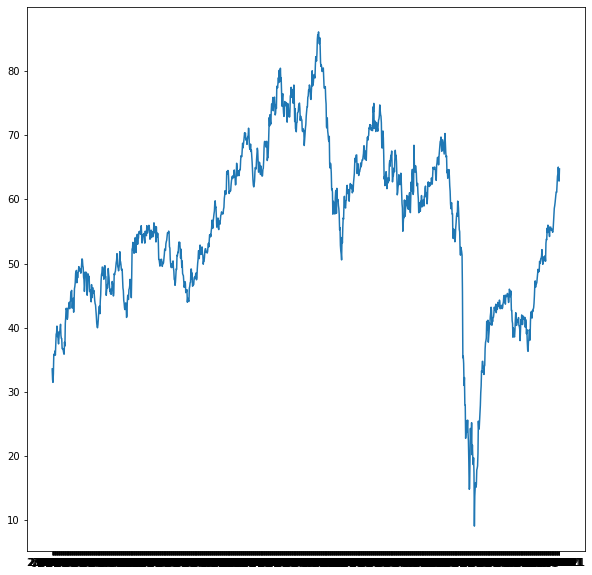

In [5]:
plt.figure(figsize=(10,10))
plt.plot(brentcrudeoil_df['DATE'], brentcrudeoil_df['BrentCrudePrice'])


# STEP 3: MAKE PREDICTIONS

In [6]:
brentcrudeoil_df = brentcrudeoil_df.rename(columns={'DATE':'ds', 'BrentCrudePrice':'y'})


In [7]:
brentcrudeoil_df

,ds,y
0,2/22/2016,33.59
1,2/23/2016,31.90
2,2/24/2016,31.50
3,2/25/2016,32.83
4,2/26/2016,35.76
...,...,...
1272,2/16/2021,63.96
1273,2/17/2021,65.02
1274,2/18/2021,64.09
1275,2/19/2021,62.84


In [8]:
m = Prophet()
m.fit(brentcrudeoil_df)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
# Forcasting into the future
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [10]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-02-22,41.629770,37.765350,55.351195,41.629770,41.629770,5.060712,5.060712,5.060712,1.793220,1.793220,1.793220,3.267492,3.267492,3.267492,0.0,0.0,0.0,46.690482
1,2016-02-23,41.650099,37.242915,55.149382,41.650099,41.650099,4.657991,4.657991,4.657991,1.671216,1.671216,1.671216,2.986775,2.986775,2.986775,0.0,0.0,0.0,46.308091
2,2016-02-24,41.670429,37.118498,54.919494,41.670429,41.670429,4.233839,4.233839,4.233839,1.556353,1.556353,1.556353,2.677485,2.677485,2.677485,0.0,0.0,0.0,45.904267
3,2016-02-25,41.690758,36.970045,54.276905,41.690758,41.690758,3.918682,3.918682,3.918682,1.578549,1.578549,1.578549,2.340134,2.340134,2.340134,0.0,0.0,0.0,45.609441
4,2016-02-26,41.711088,37.048874,54.507102,41.711088,41.711088,3.608788,3.608788,3.608788,1.633086,1.633086,1.633086,1.975703,1.975703,1.975703,0.0,0.0,0.0,45.319876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,2021-03-20,41.594759,22.268254,39.498401,41.571769,41.625828,-10.701562,-10.701562,-10.701562,-4.116212,-4.116212,-4.116212,-6.585351,-6.585351,-6.585351,0.0,0.0,0.0,30.893197
1303,2021-03-21,41.588922,21.421189,39.330566,41.561921,41.629735,-10.753814,-10.753814,-10.753814,-4.116212,-4.116212,-4.116212,-6.637603,-6.637603,-6.637603,0.0,0.0,0.0,30.835107
1304,2021-03-22,41.583085,28.389902,45.036268,41.551724,41.631378,-4.857093,-4.857093,-4.857093,1.793220,1.793220,1.793220,-6.650313,-6.650313,-6.650313,0.0,0.0,0.0,36.725991
1305,2021-03-23,41.577247,27.918575,45.064570,41.540718,41.635431,-4.954310,-4.954310,-4.954310,1.671216,1.671216,1.671216,-6.625526,-6.625526,-6.625526,0.0,0.0,0.0,36.622938


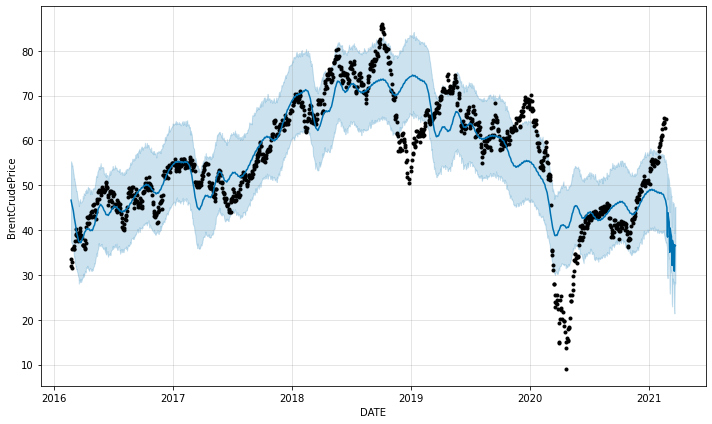

In [11]:
figure = m.plot(forecast, xlabel='DATE', ylabel='BrentCrudePrice')

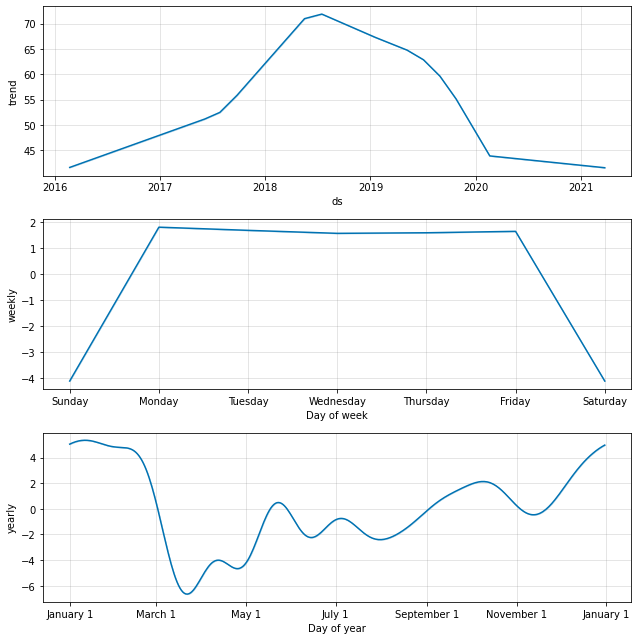

In [12]:
figure3 = m.plot_components(forecast)